# Confusion Matrix  

Confusion matrix is a technique for summarizing the performance of a classification model.

In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

###  Confusion Matrix for Binary Classification Problem

To get better understanding on how sklearn's confusion matrix works, let's start with binary classification as it is simpler than multiclass classification.

Let's assume that we already have a classifier, after we run it, we got the prediction result that we will store in "predicted" variable while the "test_y" variable contains the actual class

In [2]:
# actual
test_y = [0,0,0,0,0,1,0,1,0,1]
# predicted
predicted = [0,0,0,0,1,0,1,1,0,1]

# Create df as a comparison of sklearn's confusion matrix
df = pd.DataFrame({'actual':test_y, 'predicted': predicted})
df.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


Since scikit-learn's confusion matrix will order the label, hence in our case 0 is the positive class and 1 is the negative class.

In [3]:
# Let's check how many TP, FN, FP, TN of our test scenario
df['result'] = df.apply(lambda x: 'TP' if x['actual']==0 and x['predicted']==0 
                        else 'TN' if x['actual']==1 and x['predicted']==1 
                        else 'FN' if x['actual']==0 and x['predicted']==1
                        else 'FP', axis=1)

- True Positive (TP) : The model predicted positive class (0) as positive (0)
- False Positive (FP): The model predicted negative class (1) as positive (0)
- False Negative (FN): The model predicted positive class (0) as negative (1)
- True Negative (TN) : The model predicted negative class (1) as negative (1)

In [4]:
df.tail()

,actual,predicted,result
5,1,0,FP
6,0,1,FN
7,1,1,TN
8,0,0,TP
9,1,1,TN


In [5]:
df['result'].value_counts()

TP    5
FN    2
TN    2
FP    1
Name: result, dtype: int64

Here we got 5 TP, 1 FP, 2 FN, and 2 TN.

In [6]:
# Create confusion matrix using sklearn
cm = confusion_matrix(test_y, predicted, labels=[0,1])
cm

array([[5, 2],
       [1, 2]])

Text(0.5, 1.0, 'Confusion Matrix')

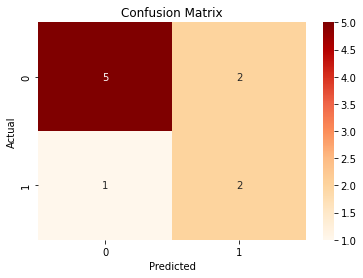

In [7]:
sns.heatmap(cm, annot=True, cmap='OrRd',fmt='g', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

Here we got the same result as we got previously i.e. 5 TP, 1 FP, 2 FN, and 2 TN.

### Precision, Recall, Sensitivity, and Specificity

- Precision: <br/>
  Equation: TP/(TP+FP)<br/>

- Recall: <br/>
  Equation: TP/(TP+FN)<br/>
  
- Sensitivity: <br/>
  Equation: TP/(TP+FN)<br/>
 
- Specificity:<br/>
  Equation: TN/(TN+FP)